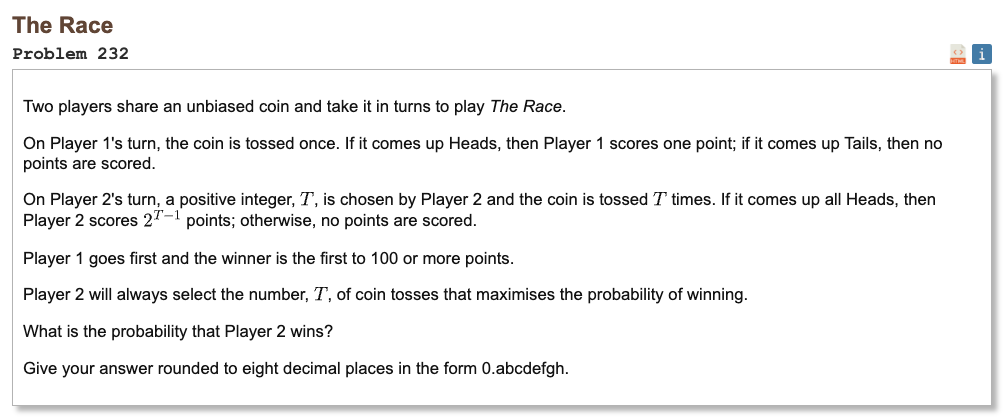

## Initial approach

* treat the game as a set of score states, player 1 score, player 2 score, and whose turn it is
* the only thing that matters is the current scores, not the history, so this is a small probability DP problem
* if it is player 1’s turn, he either adds 1 point or adds 0 points, each with probability 1/2
* if it is player 2’s turn, she chooses how many flips to try, she either scores a big jump or scores nothing
* for every score state on player 2’s turn, try all reasonable flip counts and pick the one that gives the highest eventual win chance
* compute win chances for all states up to 100 using iterative updates until the numbers stop changing
* the answer is the win chance from the starting state where both scores are 0 and it is player 1’s turn

In [1]:
import numpy as np

def solve(target=100, tol=1e-13, max_iter=200000):
    T = target
    X = np.zeros((T + 1, T + 1), dtype=float)
    Y = np.zeros((T + 1, T + 1), dtype=float)

    ns = list(range(1, 9))
    ps = [0.5 ** n for n in ns]
    inc = [2 ** (n - 1) for n in ns]

    X[T, :] = 0.0
    Y[T, :] = 0.0
    X[:, T] = 1.0
    Y[:, T] = 1.0
    X[T, T] = 0.0
    Y[T, T] = 0.0

    for _ in range(max_iter):
        maxdiff = 0.0
        for a in range(T - 1, -1, -1):
            Ya1 = Y[a + 1]
            Xa = X[a]
            for b in range(T - 1, -1, -1):
                xa = Xa[b]
                best = 0.0
                for p, add in zip(ps, inc):
                    b2 = b + add
                    val = p * (1.0 if b2 >= T else Xa[b2]) + (1.0 - p) * xa
                    if val > best:
                        best = val
                yold = Y[a, b]
                d1 = abs(best - yold)
                if d1 > maxdiff:
                    maxdiff = d1
                Y[a, b] = best
                xnew = 0.5 * best + 0.5 * Ya1[b]
                d2 = abs(xnew - xa)
                if d2 > maxdiff:
                    maxdiff = d2
                Xa[b] = xnew
        if maxdiff < tol:
            break

    return X[0, 0]

In [2]:
%%time
result = solve()
print("Result:", float(f"{result:.8f}"))

Result: 0.83648556
CPU times: user 5.99 s, sys: 18.4 ms, total: 6 s
Wall time: 6.06 s
